# `1.Stating the problem and problematic :`

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.


# `2.Importing the relevant librairies:`

In [5]:
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')



Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [6]:
df_test =pd.read_csv("Test.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
df_train =pd.read_csv("Train.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# `3.Data Inspection`





In order to define our dataset's structure (lines and columns , we will have to use df.shape())



In [8]:
df_train .shape,df_test.shape

((8523, 12), (5681, 11))

What we can understand is that We have 8523 rows and 12 columns in the Train set whereas Test set has 5681 rows and 11 columns. ( we have more data in the training set)

*After examining the Datasets , we can tell that the missing values belong to the Item_Weight and Outlet_size columns , but we still have to make sure of that by calculating the pourcentage of the missing data in both sets.*


In [9]:
df_train.isnull().sum()/df_train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
df_test.isnull().sum()/df_test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

*Conclusion : It effectively appears that the Values are missing in the 2 columns :Item_Weight and Outlet_size . We can notice that the pourcentage of missing values is 17% for Item_Weight and 28% for Outlet_size , Later on we will procceed to deal with the missing data*

Now , before dealing with the missing data , we have different kind of items : Numerical and Categorical features, and we will deal with each one of them differently , let's have an idea of how many numerical & categorical items we have in our sets !

In [11]:
#categorical features
categorical = df_train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df_train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [12]:
#categorical features
categorical =df_test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= df_test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


*  In order to deal with the missing values , we will have to work with statistics , which means we have to calculate the count , mean, etc of the set , let's do that using the df.describe() function : *

In [13]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# `4.Data cleaning and handling the missing values .`



As we already know Item_Weight and Outlet_Size got some missing values so in the coming parts we are giong to handle their misssing values


**4.1 Item weight :**  (numerical item)

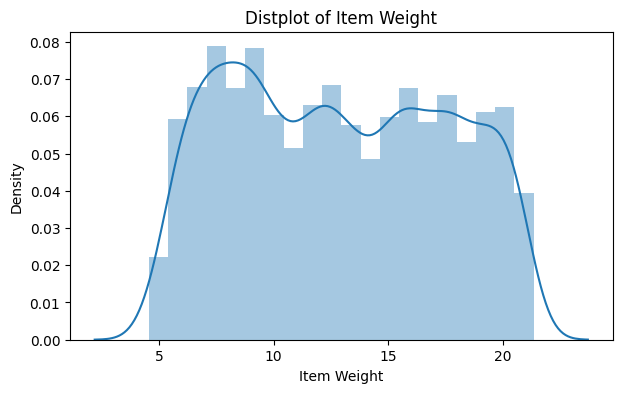

In [15]:
plt.figure(figsize=(7, 4))
sns.distplot(df_train['Item_Weight'], bins=20, kde=True)
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.title('Distplot of Item Weight')
plt.show()




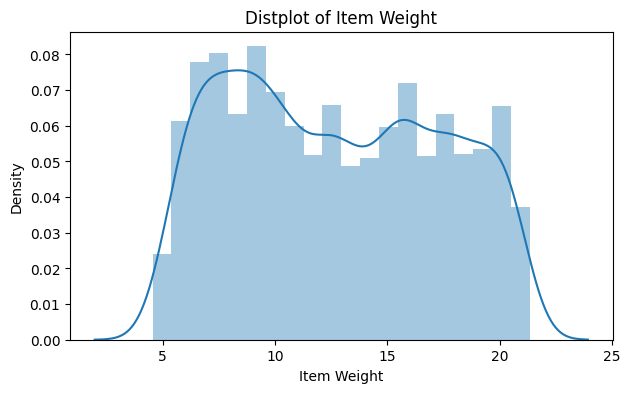

In [16]:
plt.figure(figsize=(7, 4))
sns.distplot(df_test['Item_Weight'], bins=20, kde=True)
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.title('Distplot of Item Weight')
plt.show()


**The Distplots above clearly show no "Outliers" and so we can impute the missing values with "Mean"** : we will fill the missing values in the Item_Weight column with the mean of the non-missing values.

In [17]:
df_train['Item_Weight']= df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_test['Item_Weight']= df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

*Now let's test to see if there are any more missing values in this column*




In [18]:
df_train['Item_Weight'].isnull().sum(),df_test['Item_Weight'].isnull().sum()

(0, 0)

Apparently , there are no more missing values in this column , let's see :

In [19]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3




***We have succesfully imputed the missing values from the column
Item_Weight***


**4.2 Outlet size (categorical item):**

In [20]:
print(df_train['Outlet_Size'].value_counts())
print('----------------------------------')
print(df_test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
----------------------------------
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


*As we can notice , the Outlet size is a categorical item , it indicates whether the product is small,medium or high , in order to deal with categorical missing values, we will have to use the Mode (meaning the most repeated value)*

In [21]:
#Imputing with Mode
df_train['Outlet_Size']= df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_test['Outlet_Size']= df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

df_train['Outlet_Size'].isnull().sum(),df_test['Outlet_Size'].isnull().sum()

(0, 0)

In [22]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**We have succesfully imputed the missing values from the column Outlet_Size.**


# `5.Data Visualisation and analysis`

**5.1 Univariate analysis:**

According to the dataset's columns , we will try to visualize criterions about items and then make assumptions and conclusions that will later on be of use.

Starting with the Item_type  column ,to indicate which kind of items are more available in stock.

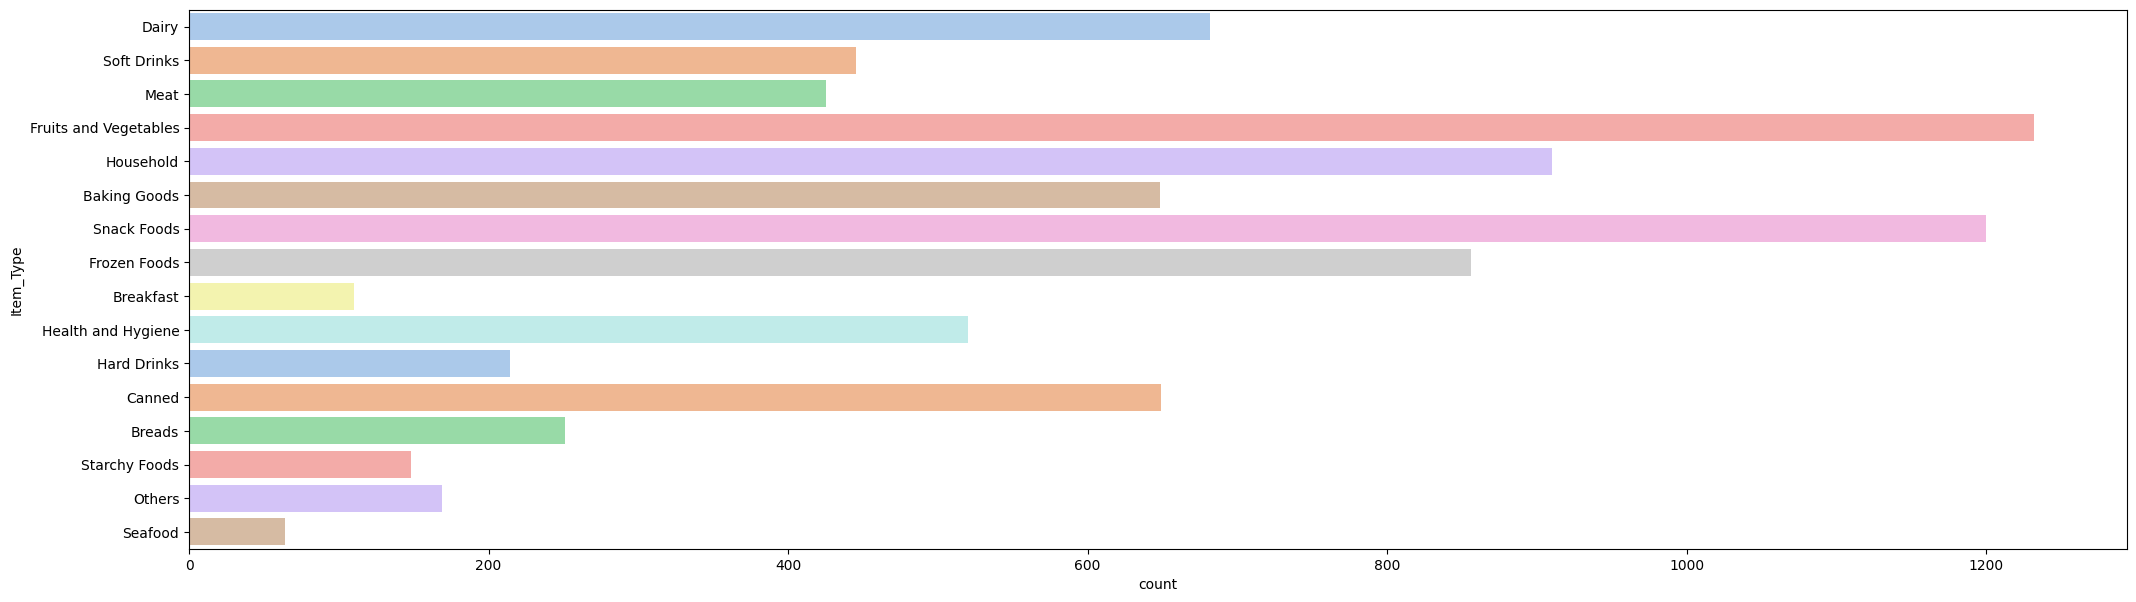

In [23]:
 plt.figure(figsize=(25,7))
sns.countplot(y='Item_Type',data=df_train,palette='pastel')
plt.show()




From this plot we conclude that:

    Fruits and vegetables are largely available because they are used on a daily basis.

    Sea food is the least available.(not bought on daily basis)



Now moving to **the outlet size** column , to see which size is preferred by clients

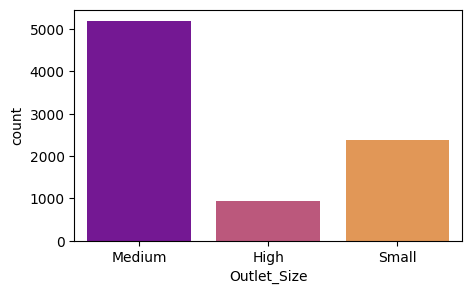

In [24]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Outlet_Size', data=df_train, palette='plasma')

plt.show()




**People tend to go for medium outlets**

###**Outlet location type the most preferred:**

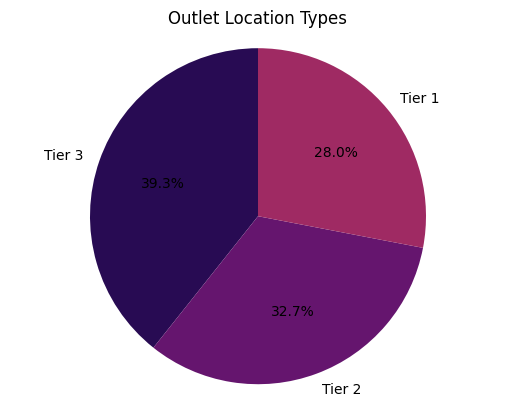

In [25]:
# Get the count of each category in "Outlet_Location_Type" column
value_counts = df_train['Outlet_Location_Type'].value_counts()

colors = sns.color_palette('inferno')

# Plot the pie chart
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Location Types')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the chart
plt.show()



**Oultes with location type tier 3 are the most preferred**


###**The bestselling product:**

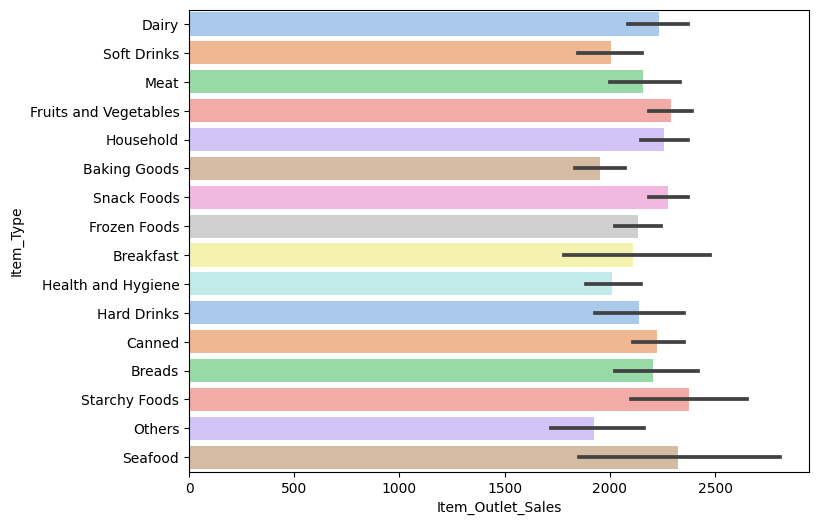

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df_train,palette='pastel')

plt.show()



***The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.***


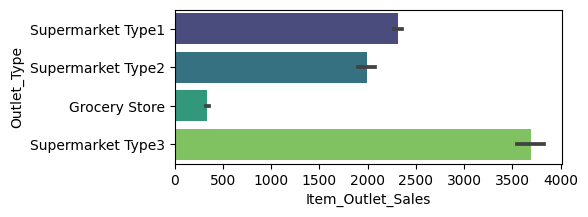

In [27]:
plt.figure(figsize=(5,2))
sns.barplot(y='Outlet_Type',x='Item_Outlet_Sales',data=df_train,palette='viridis')

plt.show()

***The sales are higher in The Supermarket Type3 , and they are smaller in outlets like Grocery stores. Which means we can focus on increasing the type 3 of supermarkets for example .***

**5.2. Bivariate analysis :**

*Let's test the correlation between different variables :*

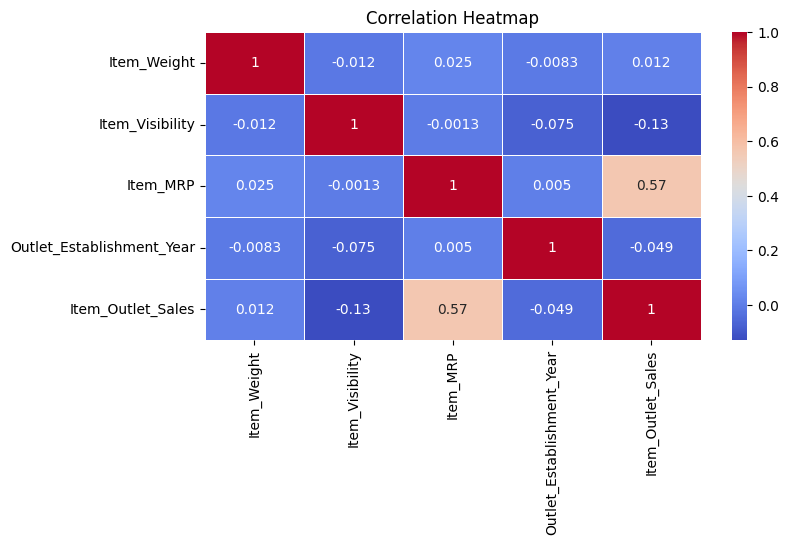

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<Figure size 800x400 with 0 Axes>

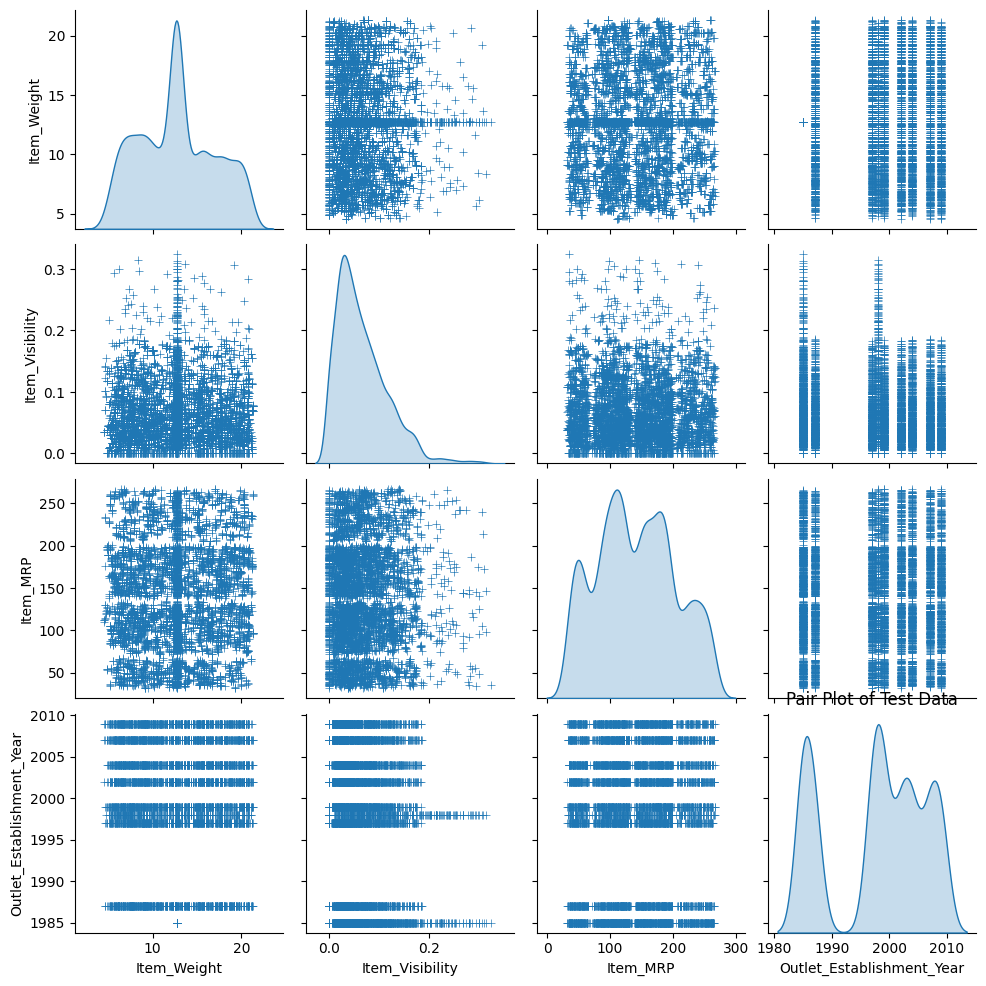

In [29]:
plt.figure(figsize=(8, 4))
sns.pairplot(df_test, diag_kind='kde', markers='+')
plt.title('Pair Plot of Test Data')
plt.show()


After plotting this heatmap plot and the pair plot we can notice that the majority of our dataset variables have a weak correlation between each other except for the variables Item_MRP and Item_Outlet_Sales that have a relatively a stronger correlation but still not an enough reason for us to make a change in our dataset.

# `6.Feature engineering.`

***This is the part where we present our data in the best way possible in order to improve the performance of our upcoming model , we can do so by removing and adding features when needed.***

**6.1 Outlet Operation years:**


 One thing we can start with is the years of function of each Outlet , and we can easily calculate that by substracting the outlet establishment year from the present year (2023)

In [30]:
#Years:
df_train['Outlet_function_Years'] = 2023 - df_train['Outlet_Establishment_Year']
df_test['Outlet_function_Years'] = 2023 - df_test['Outlet_Establishment_Year']

In [31]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_function_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


**6.2 Item type ,simplified**

It's true that we already have each item's type in our item type column , but given that each type of item is defined within the 2 first letters of its identifier (for example FD stands for food, DR for drinks...) we can benefit from that in order to create a new catefory that we can call Item_type_new)

In [32]:
df_train['Item_Type_new'] = df_train['Item_Identifier'].apply(lambda x: x[0:2])
df_train['Item_Type_new'] = df_train['Item_Type_new'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

df_test['Item_Type_new'] = df_test['Item_Identifier'].apply(lambda x: x[0:2])
df_test['Item_Type_new'] = df_test['Item_Type_new'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [33]:
df_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_function_Years,Item_Type_new
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36,Non-Consumable


In [34]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_function_Years,Item_Type_new
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24,Food
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,16,Food
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,25,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,16,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38,Food


**6.3 Modifying the Item_fat_content column :**

Now that we have set the new item type into 2 categories : food and non-consumable, we can modify the Item_fat_content column in order for it to resume the non-edible products' value into "non edible"

In [35]:
#Mark non-consumables as separate category in low_fat:
df_train.loc[df_train['Item_Type_new']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_train['Item_Fat_Content'].value_counts()

Low Fat       3612
Regular       2889
Non-Edible    1599
LF             222
reg            117
low fat         84
Name: Item_Fat_Content, dtype: int64

In [36]:
#Mark non-consumables as separate category in low_fat:
df_test.loc[df_test['Item_Type_new']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_test['Item_Fat_Content'].value_counts()

Low Fat       2386
Regular       1935
Non-Edible    1087
LF             145
reg             78
low fat         50
Name: Item_Fat_Content, dtype: int64

***We can notice that t=here still is something wrong with this column , the 'Low fat' value and LF stand for the same thing , same goes for "Regular" and reg , let's merge them by replacing "Low fat" and "LF" with "Low fat" and "Regular" and "Reg" with "Regular"***

In [37]:
# Replace values in df_train
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('reg', 'Regular')

# Replace values in df_test
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('reg', 'Regular')


In [38]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_function_Years,Item_Type_new
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25,Food
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36,Non-Consumable


In [39]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_function_Years,Item_Type_new
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,16,Food
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,25,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,16,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38,Food


# `7.Encoding categorical variables`

**This step is very crucial, we will have to convert categorical variable values into numerical ones , we will use both techniques  : Label encoding and one hot encoding :**

**Label encoding**

In [40]:
#Train dataframe:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df_train['Outlet'] = le.fit_transform(df_train['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_new','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])

#Test dataframe:

df_test['Outlet'] = le.fit_transform(df_test['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_new','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

In [41]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_function_Years,Item_Type_new,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,24,1,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,14,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,24,1,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,25,1,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,36,2,1


Now let's use one hot encoding :

**One hot encoding :**

In [44]:
#Train dataframe:

df_train = pd.get_dummies(df_train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_new','Outlet'])

#Test dataframe:

df_test = pd.get_dummies(df_test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_new','Outlet'])

In [45]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_function_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750000,0.007565,Snack Foods,107.8622,OUT049,1999,24,1,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,0.038428,Dairy,87.3198,OUT017,2007,16,0,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0.099575,Others,241.7538,OUT010,1998,25,0,1,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0.015388,Snack Foods,155.0340,OUT017,2007,16,1,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.695633,0.118599,Dairy,234.2300,OUT027,1985,38,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
df_test.iloc[:, -20:]

,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_new_0,Item_Type_new_1,Item_Type_new_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5677,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5678,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5679,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


# `8.Modeling :`

Now moving to the most important part , we will use linear regression in order to train our model and then test it to see if it works.

First of all , let's let go of some useless columns like : the identifiers

In [47]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Outlet_function_Years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_new_0', 'Item_Type_new_1',
       'Item_Type_new_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [48]:

df_train = df_train.select_dtypes(exclude='object')
df_test2 = df_test.select_dtypes(exclude='object')
df_test2.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_function_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750000,0.007565,107.8622,1999,24,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,8.300000,0.038428,87.3198,2007,16,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,1998,25,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315000,0.015388,155.0340,2007,16,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,12.695633,0.118599,234.2300,1985,38,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


***Now ,let's separate the input variables(or features)from the output or target variables , in our case that would be the Item_Outlet_Sales.***

In [49]:
X= df_train.drop(columns = ['Item_Outlet_Sales'], axis=1)
Y= df_train['Item_Outlet_Sales']
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_function_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,1999,24,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,2009,14,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1999,24,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,1998,25,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,36,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# ***Linear regression :***

**Training the model on the training dataset:**

In [50]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X, Y)

LinearRegression()

**Model testing :**

In [51]:
# Predict the outputs for the test dataset
predictions = lr.predict(df_test2)
print(predictions)

[1847.   1573.5  1873.75 ... 1809.   3561.5  1264.  ]


**Merging the predicted sales with df_test dataframe:**

In [52]:
# Create a new dataframe 'df_predictions' with the predictions
df_predictions = pd.DataFrame(predictions, columns=['sales_predictions'])

# Merge the 'df_test' dataframe with the 'df_predictions' dataframe
df_merged = pd.concat([df_test, df_predictions], axis=1)
df_merged = df_merged[['Item_Identifier', 'Outlet_Identifier', 'sales_predictions']]
df_merged.head()

,Item_Identifier,Outlet_Identifier,sales_predictions
0,FDW58,OUT049,1847.00
1,FDW14,OUT017,1573.50
2,NCN55,OUT010,1873.75
3,FDQ58,OUT017,2592.75
4,FDY38,OUT027,5178.75


In [53]:
df_merged.to_csv('/content/sample_data/final.csv', index=False)
from google.colab import files
files.download('/content/sample_data/final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Regularized Linear Regression:**





Let's higher our model's performance level by adding regularized regression

In [54]:
from sklearn.linear_model import Ridge, Lasso

# Regularized Linear Regression with Ridge (L2 regularization)
ridge = Ridge(alpha=0.5)  # Specify the regularization parameter alpha
ridge.fit(X, Y)  # Train the Ridge model on the training data

Ridge(alpha=0.5)

In [55]:
# Predict the outputs for the test dataset
predictions2 = lr.predict(df_test2)
print(predictions2)

[1847.   1573.5  1873.75 ... 1809.   3561.5  1264.  ]
